In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

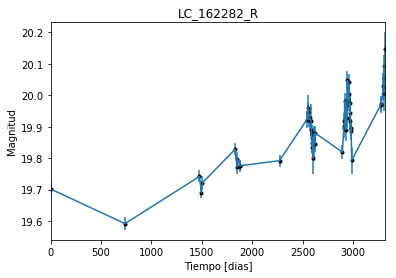

In [2]:
data = np.genfromtxt('LC_162282_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_162282_R')
plt.savefig("LC_162282_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

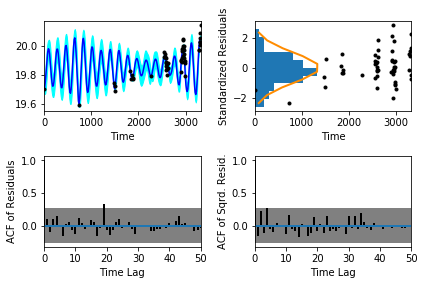

In [5]:
sample.assess_fit()

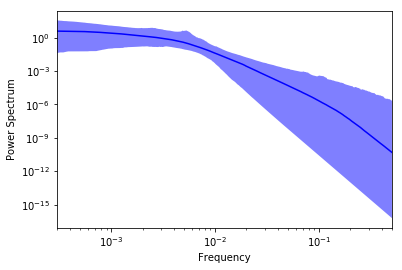

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

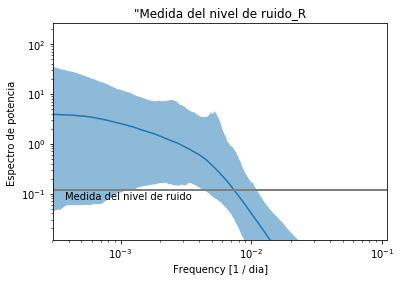

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_162282_R')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_162282_R')

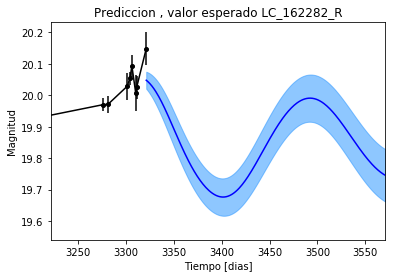

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_162282_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_162282_R')

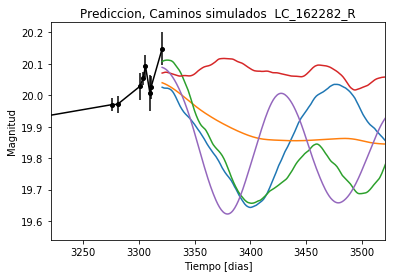

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_162282_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


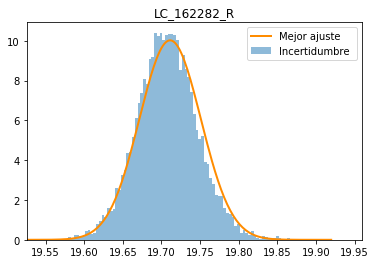

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_162282_R')
plt.savefig("Mejor_ajuste_LC_162282_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_162282_R')

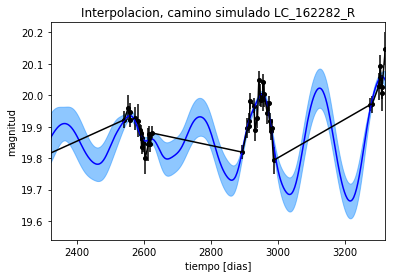

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_162282_R')

Text(0.5,1,'Interpolacion, camino simulado LC_162282_R')

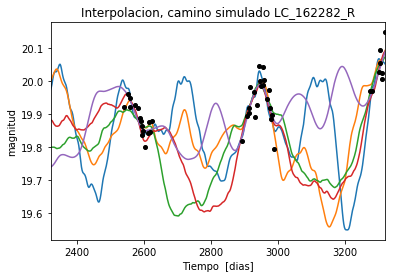

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_162282_R')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1094.54003628
Median: 0.0109898922223
Standard deviation: 0.203771565903
68% credibility interval: [ 0.00095146  0.19408572]
95% credibility interval: [  3.68368383e-04   8.26544935e-01]
99% credibility interval: [  3.15429204e-04   9.62762412e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 668.836419974
Median: 0.00379990169934
Standard deviation: 0.110678386724
68% credibility interval: [ 0.00070471  0.04699181]
95% credibility interval: [  3.44237254e-04   3.55590387e-01]
99% credibility interval: [  3.12989764e-04   8.64297299e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 346.471932936
Median: 0.0147940968426


In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 494.188862092
Median: 109.954746892
Standard deviation: 1.79596738577
68% credibility interval: [ 108.04948873  111.31172644]
95% credibility interval: [ 105.53476318  112.57173632]
99% credibility interval: [ 103.43454979  113.93334723]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 629.554239426
Median: 0.647998605708
Standard deviation: 2.28144294808
68% credibility interval: [ 0.07251036  4.009432  ]
95% credibility interval: [ 0.01996261  7.95847069]
99% credibility interval: [  0.01223417  11.17717133]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 519.728398155
Median: 0.507826675173
Standard deviation: 9.12389139487
68% credibility interval: [ 0.01512154  8.59916708]
95% credibility interval: [  2.58785764e

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1349.95701102
Median: 1.33706153251e-31
Standard deviation: 9.1622265934e+41
68% credibility interval: [  9.61959386e-89   3.88630999e-04]
95% credibility interval: [  2.91296756e-128   1.87170674e+033]
99% credibility interval: [  9.00623167e-141   9.46871289e+035]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1742.78987457
Median: 19.8113097736
Standard deviation: 0.0635880470457
68% credibility interval: [ 19.75046798  19.86310646]
95% credibility interval: [ 19.66999488  19.9250889 ]
99% credibility interval: [ 19.61067635  19.99737856]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 463.628392575
Median: 0.0111468772337
Standard deviation: 0.238367163633
68% credibility interval: [ 0.          0.35980307]
95% credibility interval: [ 0.          0.85545193]
99% credibility interval: [ 0.         0.9834651]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 463.628392575
Median: 0.0111468772337
Standard deviation: 0.238367163633
68% credibility interval: [ 0.          0.35980307]
95% credibility interval: [ 0.          0.85545193]
99% credibility interval: [ 0.         0.9834651]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 361.621004272
Median: 0.0
Standard deviation: 0.00181569761184
68% credibi

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 494.188862092
Median: 109.954746892
Standard deviation: 1.79596738577
68% credibility interval: [ 108.04948873  111.31172644]
95% credibility interval: [ 105.53476318  112.57173632]
99% credibility interval: [ 103.43454979  113.93334723]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1743.95166772
Median: 0.0215284944274
Standard deviation: 0.0205393397606
68% credibility interval: [ 0.01319448  0.03927522]
95% credibility interval: [ 0.00891297  0.07992757]
99% credibility interval: [ 0.00705511  0.11927306]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1619.9658017
Median: 1.0246171503
Standard deviation: 0.172301596482
68% credibility interval: [ 0.87605373  1.20522064]
95% credibility interval: [ 0.7532299  1.4191512]
99% credibility interval: [ 0.68953774  1.60723534]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 945.167524136
Median: 0.000458797932377
Standard deviation: 0.117058640125
68% credibility interval: [  2.71022578e-06   1.02408184e-02]
95% credibility interval: [  4.63373387e-37   1.14428501e-01]
99% credibility interval: [  4.05862604e-40   1.12376258e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1094.54003628
Median: (-0.0690515293386-0.0124299946864j)
Standard deviation: 1.97037481262
68% credibility interval: [-1.21947654+0.j         -0.00597821-0.03045771j]
95% credibility interval: [ -5.19333499e+00+0.j         -2.31452681e-03-0.0330392j]
99% credibility interval: [ -6.04921464e+00+0.j          -1.98190014e-03-0.03012855j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 668.836419974
Median: (-0.023875486526+0.366690667294j)
Standard deviation: 1.65127811964
68% credibility interval: [-0.29525822+1.1677302j  -0.00442781+0.05404246j]
95% credibility interval: [ -2.23424029e+00+1.34136709j  -2.16290646e-03+0.j        ]
99% credibility interval: [ -5.43054009e+00+3.60520021j  -1.96657269e-03+0.j        ]
Post